如果给定几个报告之间的距离矩阵，要如何将这些点的相似关系可视化？

In [107]:
import random
import numpy as np

先随机生成一二维点

In [108]:
array_size = (20, 2)
array = np.random.randint(0, 10000, size=array_size)
array2 = np.random.randint(0, 10000, size=array_size)
print(array)
print(array2)

[[6541   54]
 [5348 4543]
 [8460 6412]
 [ 147 9464]
 [8048 9010]
 [4203 7301]
 [4932 5911]
 [7062 9163]
 [  23 9655]
 [1662 9446]
 [1990 5037]
 [2056 8000]
 [6915 9101]
 [9704 7767]
 [2051  497]
 [1496 9369]
 [8334 9756]
 [7718 1132]
 [5668 1829]
 [2038  164]]
[[2929 5681]
 [4978  614]
 [  51 2320]
 [1081 6451]
 [8237 8199]
 [ 211 4645]
 [3266 8564]
 [3444 7481]
 [4765 9266]
 [9780  354]
 [6035 4828]
 [6576   50]
 [ 851 3498]
 [2163 2255]
 [1543 6377]
 [8904  173]
 [1610 7372]
 [9789 7959]
 [1543 3200]
 [5375 2754]]


求出点与点之间的距离

In [109]:
def distance(points):
    size = len(points)
    distance_matrix = np.zeros((size, size))
    for i in range(0, size):
        for j in range(0, size):
            dis = (points[i] - points[j])
            distance_matrix[i, j] = np.sqrt(np.inner(dis, dis))
    return distance_matrix




dist = distance(array)

先写一个验证过程，用来验证这种可视化是否符合人的直观感受

In [110]:
def to_order(array):
    arr = []
    for i in range(0, len(array)):
        arr.append((array[i], i))
    data_type = [('data', float), ('idx', int)]
    arr = np.array(arr, dtype=data_type)
    arr = np.sort(arr, order='data')
    order = np.zeros((len(array),))
    for i in range(0, len(arr)):
        order[arr[i][1]] = i
    return order

def test(distance_matrix, visualized_points):
    visualized_distance = distance(visualized_points)
    diff_pairs = 0
    for i in range(0, len(visualized_points)):
        ori_order = to_order(distance_matrix[i])
        curr_order = to_order(visualized_distance[i])
        for j in range(0, len(ori_order)):
            for k in range(0, len(ori_order)):
                if distance_matrix[i, k] != distance_matrix[i, j] and (ori_order[j] > ori_order[k]) != (curr_order[j] > curr_order[k]):
                    diff_pairs += 1
    return diff_pairs / len(visualized_points)**3
test(dist, array2)


0.45175

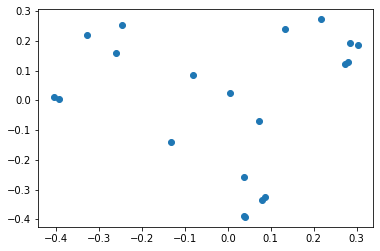

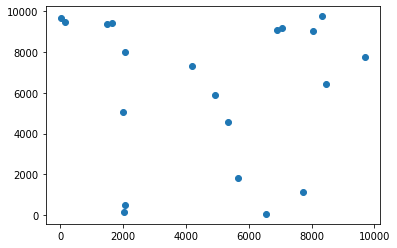

0.04275

In [111]:
import math

import pandas as pd
import scipy.io

from sklearn import manifold

iso = manifold.LocallyLinearEmbedding(n_neighbors = 15, n_components = 2,
                                method='standard')
iso.fit(dist)
manifold_2Da = iso.transform(dist)


import matplotlib.pyplot as plt
import numpy as np



plt.scatter(manifold_2Da.T[0], manifold_2Da.T[1])
plt.show()
plt.scatter(array.T[0], array.T[1])
plt.show()
test(dist, manifold_2Da)

In [112]:
def distance_sq(points):
    size = len(points) // 2
    distance_matrix = np.zeros((size, size))
    for i in range(0, size):
        for j in range(0, size):
            dis = np.array([points[i * 2] - points[j * 2], points[i * 2 + 1] - points[j * 2 + 1]])
            distance_matrix[i, j] = np.inner(dis, dis)
    return distance_matrix





from scipy import optimize
# 这里的f 可以自定义，这里为了更加直观的演示，使用的是较为简单的函数。
dist = distance_sq(array.reshape((2*len(array),)))
def f(x):
    return np.sum((distance_sq(x) - dist)**2)
def fprime(x):
    x = x.reshape((len(target) // 2, 2))
    
#  梯度下降，这里我们要给出函数变量的初始值。
target = optimize.fmin_cg(f, array2.reshape((2*len(array),)))

         Current function value: 0.000006
         Iterations: 44
         Function evaluations: 5136
         Gradient evaluations: 125


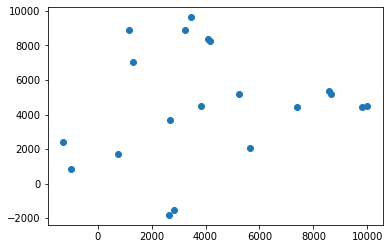

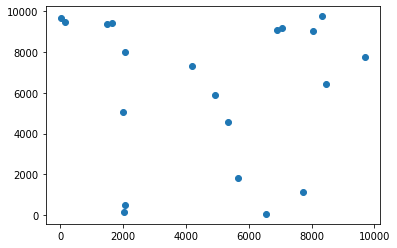

0.0

In [113]:
target = target.reshape((len(target) // 2, 2))
test(distance(array), target)
plt.scatter(target.T[0], target.T[1])
plt.show()
plt.scatter(array.T[0], array.T[1])
plt.show()
test(dist, target)